Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [2]:
hotel_booking = pd.read_csv('hotel_booking.csv')
print(hotel_booking.shape)
hotel_booking.head(5)

(119390, 36)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


#### I. Basic EDA

In [3]:

hotel_booking.groupby('is_canceled').count().iloc[:,0]

is_canceled
0    75166
1    44224
Name: hotel, dtype: int64

In [ ]:
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Drop unwanted columns

In [4]:
# drop persontal info
hotel_booking.drop(["name","email","phone-number","credit_card"], axis = 1, inplace=True)
# drop repeated info
hotel_booking.drop(["reservation_status","reservation_status_date","arrival_date_year","arrival_date_month","arrival_date_day_of_month"], axis = 1, inplace=True)
# drop unwanted info
hotel_booking.drop(["assigned_room_type","agent","company"], axis = 1, inplace=True)

Looking for missing/invalid data

In [5]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,27.165173,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
hotel_booking.isnull().sum()[hotel_booking.isnull().sum()!=0]

children      4
country     488
dtype: int64

In [7]:
hotel_booking.drop(['country'],axis=1, inplace=True)
hotel_booking['children'].fillna(0,inplace=True)
hotel_booking.isnull().sum()[hotel_booking.isnull().sum()!=0]

Series([], dtype: int64)

Re-arrange input/target variables

In [8]:
y = hotel_booking.is_canceled
num_input = hotel_booking[['lead_time', 'arrival_date_week_number','stays_in_weekend_nights', 'stays_in_week_nights', 'adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes', 'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]
cate_input = hotel_booking[['hotel','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type']]
bool_input = hotel_booking[['is_repeated_guest']]

In [9]:
cate_input

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient
...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient


In [10]:
dummies = pd.get_dummies(cate_input,drop_first=True)
dummies.head(5)

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
X = pd.concat([num_input,bool_input,dummies],axis=1)
X

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,0,0,2,0.0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
1,737,27,0,0,2,0.0,0,0,0,4,...,0,0,0,0,0,0,0,0,1,0
2,7,27,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,27,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,27,0,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119386,102,35,2,5,3,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119387,34,35,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119388,109,35,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### II Further Attribute Selection

##### 2.1 Correlation Analysis

In [12]:
temp = pd.concat([X,y],axis=1)
temp.corr()[temp.corr()>0.7].count()

lead_time                         1
arrival_date_week_number          1
stays_in_weekend_nights           1
stays_in_week_nights              1
adults                            1
children                          1
babies                            1
previous_cancellations            1
previous_bookings_not_canceled    1
booking_changes                   1
days_in_waiting_list              1
adr                               1
required_car_parking_spaces       1
total_of_special_requests         1
is_repeated_guest                 1
hotel_Resort Hotel                1
meal_FB                           1
meal_HB                           1
meal_SC                           1
meal_Undefined                    1
market_segment_Complementary      1
market_segment_Corporate          1
market_segment_Direct             2
market_segment_Groups             1
market_segment_Offline TA/TO      1
market_segment_Online TA          1
market_segment_Undefined          1
distribution_channel_Direct 

In [13]:
print(temp.corr().market_segment_Direct[temp.corr().market_segment_Direct>0.7])
print(temp.corr().distribution_channel_Direct[temp.corr().distribution_channel_Direct>0.7])

market_segment_Direct          1.00000
distribution_channel_Direct    0.89146
Name: market_segment_Direct, dtype: float64
market_segment_Direct          0.89146
distribution_channel_Direct    1.00000
Name: distribution_channel_Direct, dtype: float64


In [14]:
temp.corr().is_canceled

lead_time                         0.293123
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
is_repeated_guest                -0.084793
hotel_Resort Hotel               -0.136531
meal_FB                           0.038828
meal_HB                          -0.019845
meal_SC                           0.001282
meal_Undefined                   -0.025896
market_segment_Complementary     -0.039306
market_segment_Corporate         -0.081667
market_segment_Direct            -0.154390
market_segm

In [15]:
X.drop(['distribution_channel_Direct','distribution_channel_GDS', 'distribution_channel_TA/TO','distribution_channel_Undefined'],inplace=True,axis=1)
X

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,0,0,2,0.0,0,0,0,3,...,0,0,0,0,0,0,0,0,1,0
1,737,27,0,0,2,0.0,0,0,0,4,...,0,0,0,0,0,0,0,0,1,0
2,7,27,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,27,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,27,0,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119386,102,35,2,5,3,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119387,34,35,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119388,109,35,2,5,2,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### 2.2 Lasso

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [17]:
logisticRegressor = LogisticRegression(solver='saga',penalty='l1',max_iter=10000)
logisticRegressor.fit(X_train,y_train)
y_test_predict = logisticRegressor.predict(X_test)
print(accuracy_score(y_test, y_test_predict))

0.7919423737331435


In [18]:
lassoCoef = pd.DataFrame(logisticRegressor.coef_.T,index=X.columns)
lassoCoef

,0
lead_time,0.005029
arrival_date_week_number,-0.007224
stays_in_weekend_nights,0.001185
stays_in_week_nights,0.020977
adults,-0.201992
children,0.051080
babies,-0.002020
previous_cancellations,0.609075
previous_bookings_not_canceled,-0.225879
booking_changes,-0.512905


9
26
0.8133009464779295


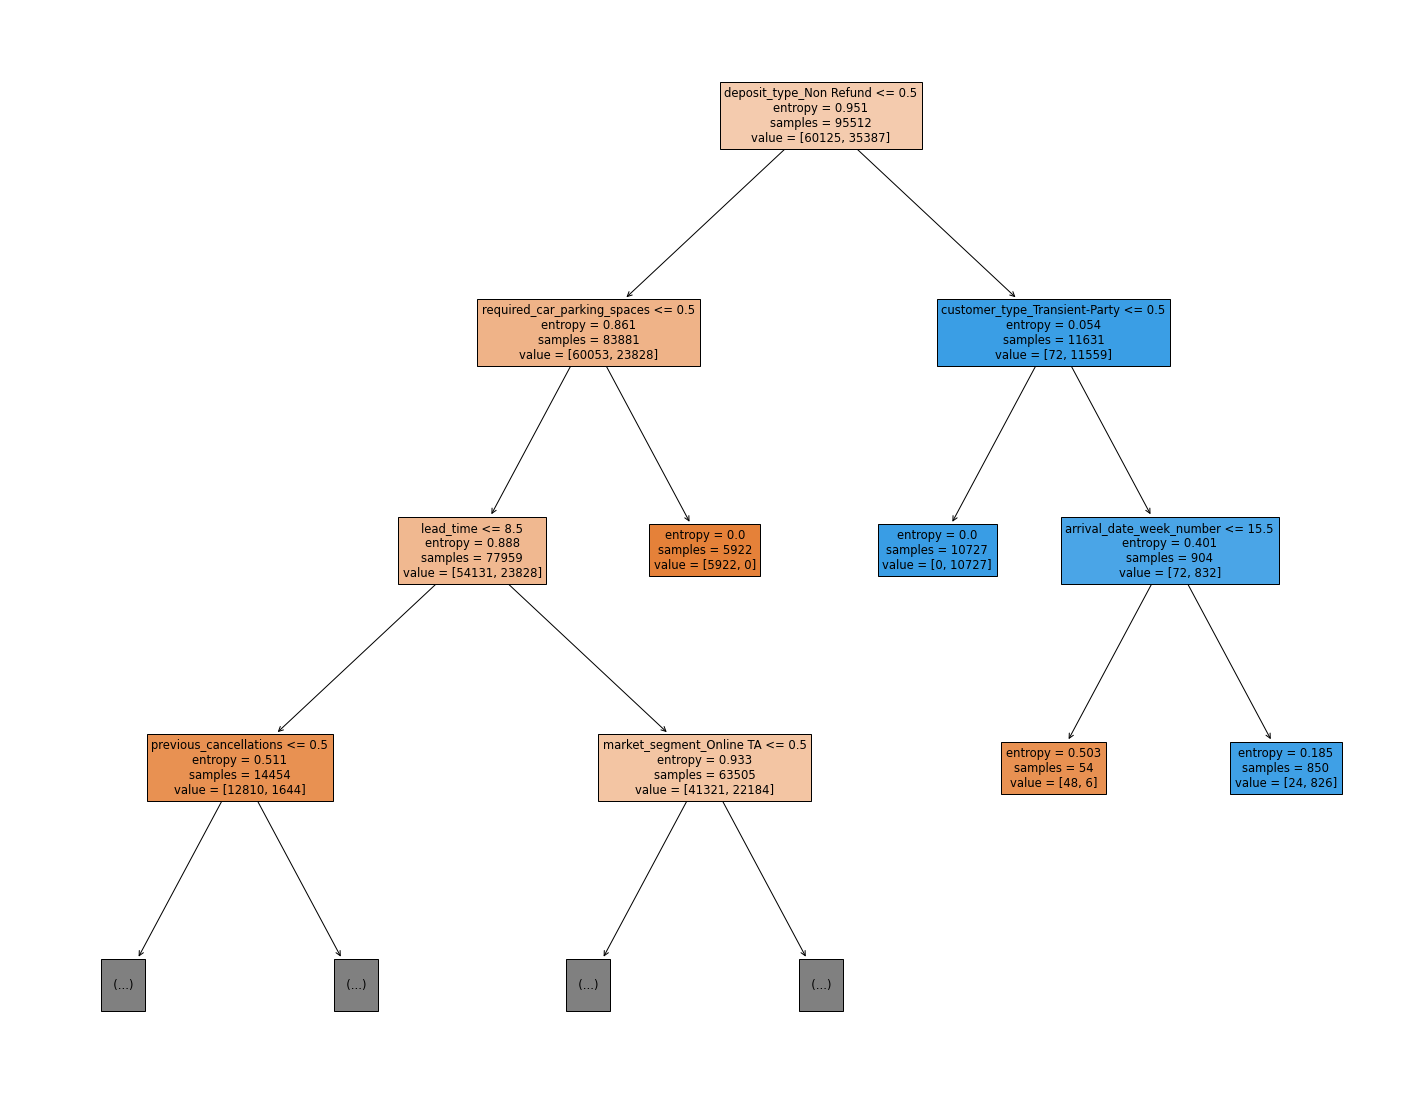

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)
prunedTree1 = DecisionTreeClassifier(criterion = "entropy",  ccp_alpha = .001,
                                        random_state = 12345)
prunedTree1.fit(X_train, y_train)
print(prunedTree1.tree_.max_depth)
print(prunedTree1.tree_.n_leaves)
dt_pred = prunedTree1.predict(X_test)

print(prunedTree1.score(X_test, y_test))
pd.crosstab(dt_pred, y_test, rownames = ["Predicted"], colnames = ["Actual"])

plt.figure(figsize=(25,20))
tree.plot_tree(prunedTree1, feature_names = X.columns,  filled=True, max_depth=3)
plt.show()

0.8133009464779295
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     15041
           1       0.83      0.62      0.71      8837

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.79     23878
weighted avg       0.82      0.81      0.81     23878



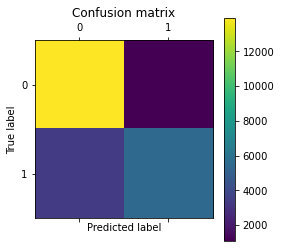

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
PT1_predict = prunedTree1.predict(X_test)
print(prunedTree1.score(X_test, y_test))
print(classification_report(y_test, PT1_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, PT1_predict)

In [21]:
randomForest1 = RandomForestClassifier(criterion = "entropy", random_state = 12345, n_estimators= 200, oob_score = True)
randomForest1.fit(X_train, y_train)
influence = pd.Series(randomForest1.feature_importances_, index = X.columns)
influence.sort_values(inplace = True, ascending = False)
print(influence)

lead_time                         0.192048
adr                               0.143102
deposit_type_Non Refund           0.120477
arrival_date_week_number          0.120265
stays_in_week_nights              0.056069
total_of_special_requests         0.055604
previous_cancellations            0.038430
stays_in_weekend_nights           0.032813
required_car_parking_spaces       0.030779
booking_changes                   0.024567
market_segment_Online TA          0.019021
adults                            0.018335
customer_type_Transient           0.017310
market_segment_Groups             0.015727
customer_type_Transient-Party     0.013834
hotel_Resort Hotel                0.011920
market_segment_Offline TA/TO      0.011615
reserved_room_type_D              0.009657
meal_HB                           0.008823
market_segment_Direct             0.008196
children                          0.007806
previous_bookings_not_canceled    0.006625
meal_SC                           0.005660
reserved_ro

0.8641008459669989
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15041
           1       0.86      0.76      0.80      8837

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



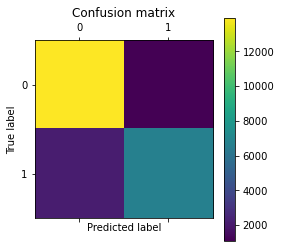

In [22]:
RF1_predict = randomForest1.predict(X_test)
print(randomForest1.score(X_test, y_test))
print(classification_report(y_test, RF1_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, RF1_predict)

# DT with update attributes

0.8127565122707094
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     15041
           1       0.83      0.62      0.71      8837

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.79     23878
weighted avg       0.82      0.81      0.81     23878



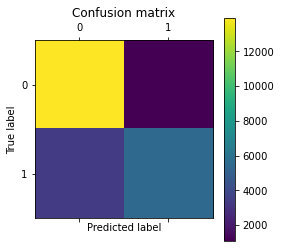

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_update, y, test_size = 0.2, random_state=12345)
prunedTree1.fit(X_train, y_train)
PT1_predict = prunedTree1.predict(X_test)
print(prunedTree1.score(X_test, y_test))
print(classification_report(y_test, PT1_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, PT1_predict)

# RF with update attributes

0.8587402630036016
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15041
           1       0.85      0.75      0.80      8837

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.84     23878
weighted avg       0.86      0.86      0.86     23878



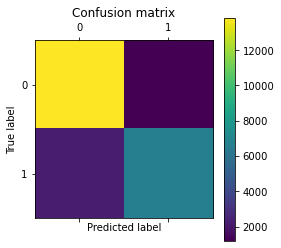

In [55]:
randomForest1.fit(X_train, y_train)
RF1_predict = randomForest1.predict(X_test)
print(randomForest1.score(X_test, y_test))
print(classification_report(y_test, RF1_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, RF1_predict)

# BernoulliNB

In [30]:
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
BNB_predict = BNB.predict(X_test)
print("accuracy of NB: " + str(metrics.accuracy_score(y_test, BNB_predict)))
pd.crosstab(BNB.predict(X_test),y_test,rownames = ["Predicted"], colnames = ["Actual"])

accuracy of NB: 0.7591506826367368


Actual,0,1
Predicted,,
0,13195,3947
1,1804,4932


# MultinomialNB on original X set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.629942
1    0.370058
Name: is_canceled, dtype: float64
0    0.628151
1    0.371849
Name: is_canceled, dtype: float64


In [29]:
from sklearn import metrics
NB = MultinomialNB()
NB.fit(X_train, y_train)
NB_predict = NB.predict(X_test)
print("accuracy of NB: " + str(metrics.accuracy_score(y_test, NB_predict)))
pd.crosstab(NB.predict(X_test),y_test,rownames = ["Predicted"], colnames = ["Actual"])

accuracy of NB: 0.6460758857525756


Actual,0,1
Predicted,,
0,10819,4271
1,4180,4608


0.6460758857525756
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     14999
           1       0.52      0.52      0.52      8879

    accuracy                           0.65     23878
   macro avg       0.62      0.62      0.62     23878
weighted avg       0.65      0.65      0.65     23878



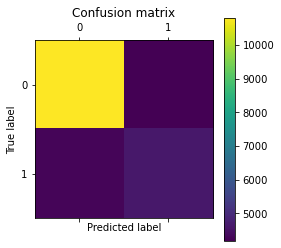

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print(NB.score(X_test, y_test))
print(classification_report(y_test, NB_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, NB_predict)

# MultinomialNB using updated X

In [31]:
X_update = X[['lead_time','adr', 'deposit_type_Non Refund','arrival_date_week_number','stays_in_week_nights','total_of_special_requests',
            'previous_cancellations','stays_in_weekend_nights','required_car_parking_spaces','booking_changes','market_segment_Online TA',
            'adults','customer_type_Transient','market_segment_Groups','customer_type_Transient-Party','hotel_Resort Hotel',
            'market_segment_Offline TA/TO']]
print(X_update.shape)

(119390, 17)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_update, y, test_size=0.20, random_state=1234)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.629942
1    0.370058
Name: is_canceled, dtype: float64
0    0.628151
1    0.371849
Name: is_canceled, dtype: float64


In [52]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
NB_predict = NB.predict(X_test)
print("accuracy of NB: " + str(metrics.accuracy_score(y_test, NB_predict)))
pd.crosstab(NB.predict(X_test),y_test,rownames = ["Predicted"], colnames = ["Actual"])

accuracy of NB: 0.645950247089371


Actual,0,1
Predicted,,
0,10739,4194
1,4260,4685


0.645950247089371
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     14999
           1       0.52      0.53      0.53      8879

    accuracy                           0.65     23878
   macro avg       0.62      0.62      0.62     23878
weighted avg       0.65      0.65      0.65     23878



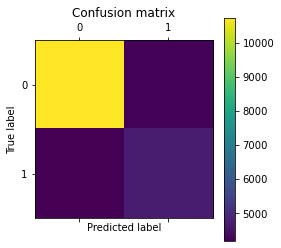

In [53]:
print(NB.score(X_test, y_test))
print(classification_report(y_test, NB_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, NB_predict)

# MultinomialNB on binned numberic data

In [34]:
X_new = X.copy()
X_new.arrival_date_week_number = pd.qcut(X.arrival_date_week_number, q=4, labels = False)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=27)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
NB = MultinomialNB()
NB.fit(X_train, y_train)

print("accuracy of NB: " + str(metrics.accuracy_score(y_test, NB.predict(X_test))))
pd.crosstab(NB.predict(X_test),y_test,rownames = ["Predicted"], colnames = ["Actual"])

0    0.628811
1    0.371189
Name: is_canceled, dtype: float64
0    0.632674
1    0.367326
Name: is_canceled, dtype: float64
accuracy of NB: 0.6480023452550465


Actual,0,1
Predicted,,
0,10856,4154
1,4251,4617


0.6480023452550465
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     15107
           1       0.37      0.38      0.37      8771

    accuracy                           0.53     23878
   macro avg       0.50      0.50      0.50     23878
weighted avg       0.54      0.53      0.53     23878



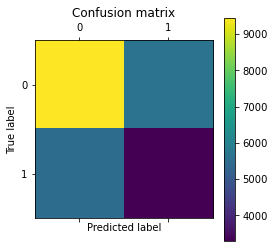

In [36]:
print(NB.score(X_test, y_test))
print(classification_report(y_test, NB_predict))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, NB_predict)

# KNN Model using MinMaxscalar

In [37]:
from sklearn.preprocessing import MinMaxScaler
X_n = X.copy()
X_n.iloc[:, 0:41]= MinMaxScaler().fit_transform(X_n.iloc[:, 0:41])

In [38]:
pd.DataFrame.max(X_n.iloc[:,0:]).describe()

count    4.100000e+01
mean     1.000000e+00
std      3.925231e-17
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size = 0.2, random_state=12345)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.629502
1    0.370498
Name: is_canceled, dtype: float64
0    0.62991
1    0.37009
Name: is_canceled, dtype: float64


In [40]:
print(X_n.shape)

(119390, 41)


In [41]:
np.random.seed(123)
X_knn_n = KNeighborsClassifier(n_neighbors = 345)
X_knn_n.fit(X_train, y_train)
knn_n_pred = X_knn_n.predict(X_test)

In [42]:
print(accuracy_score(y_test,knn_n_pred))
pd.crosstab(knn_n_pred, y_test,rownames = ["Predicted"], colnames = ["Actual"])

0.7905603484378926


Actual,0,1
Predicted,,
0,14045,4005
1,996,4832


0.7905603484378926
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     15041
           1       0.83      0.55      0.66      8837

    accuracy                           0.79     23878
   macro avg       0.80      0.74      0.75     23878
weighted avg       0.80      0.79      0.78     23878



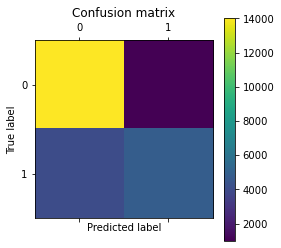

In [43]:
print(X_knn_n.score(X_test, y_test))
print(classification_report(y_test, knn_n_pred))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, knn_n_pred)

# KNN Model using standard normalization

In [44]:
from sklearn.preprocessing import StandardScaler
X_z = X.copy()
X_z.iloc[:,0:41]= StandardScaler().fit_transform(X_z.iloc[:,0:41])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size = 0.2, random_state=12345)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
np.random.seed(123)
X_knn_z = KNeighborsClassifier(n_neighbors = 345)
X_knn_z.fit(X_train, y_train)
knn_z_pred = X_knn_z.predict(X_test)

0    0.629502
1    0.370498
Name: is_canceled, dtype: float64
0    0.62991
1    0.37009
Name: is_canceled, dtype: float64


In [46]:
print(accuracy_score(y_test,knn_z_pred))
pd.crosstab(knn_z_pred, y_test,rownames = ["Predicted"], colnames = ["Actual"])

0.7928218443755758


Actual,0,1
Predicted,,
0,13836,3742
1,1205,5095


0.7928218443755758
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     15041
           1       0.81      0.58      0.67      8837

    accuracy                           0.79     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.79      0.78     23878



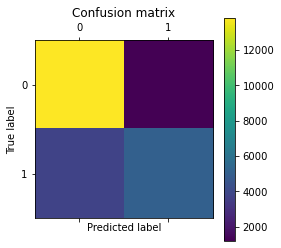

In [47]:
print(X_knn_z.score(X_test, y_test))
print(classification_report(y_test, knn_z_pred))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, knn_z_pred)

# KNN Model using updated data

In [48]:
X_update_z = X_update.copy()
X_update_z.iloc[:,0:41]= StandardScaler().fit_transform(X_update_z.iloc[:,0:41])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_update_z, y, test_size = 0.2, random_state=12345)
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))
np.random.seed(123)
X_knn_z = KNeighborsClassifier(n_neighbors = 345)
X_knn_z.fit(X_train, y_train)
knn_z_pred = X_knn_z.predict(X_test)

0    0.629502
1    0.370498
Name: is_canceled, dtype: float64
0    0.62991
1    0.37009
Name: is_canceled, dtype: float64


0.8013233939190887
              precision    recall  f1-score   support

           0       0.79      0.93      0.85     15041
           1       0.83      0.59      0.69      8837

    accuracy                           0.80     23878
   macro avg       0.81      0.76      0.77     23878
weighted avg       0.80      0.80      0.79     23878



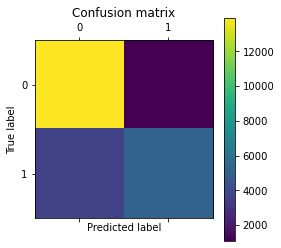

In [50]:
print(X_knn_z.score(X_test, y_test))
print(classification_report(y_test, knn_z_pred))
def create_cm(t1, t2):
    cm = confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
create_cm(y_test, knn_z_pred)